# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

### Resposta item a: Obtenha a média e a diferença através de uma multiplicação matricial

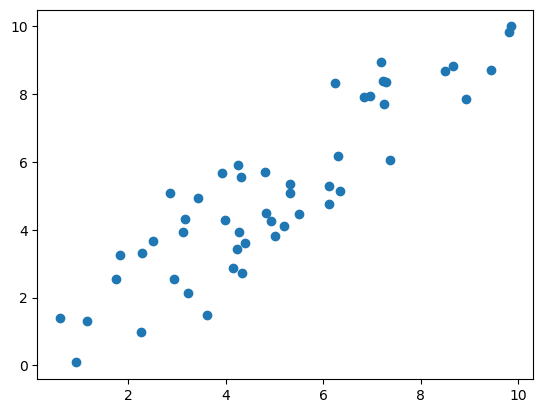

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

#Plotando
plt.scatter(x = df.p1, y=df.p2);

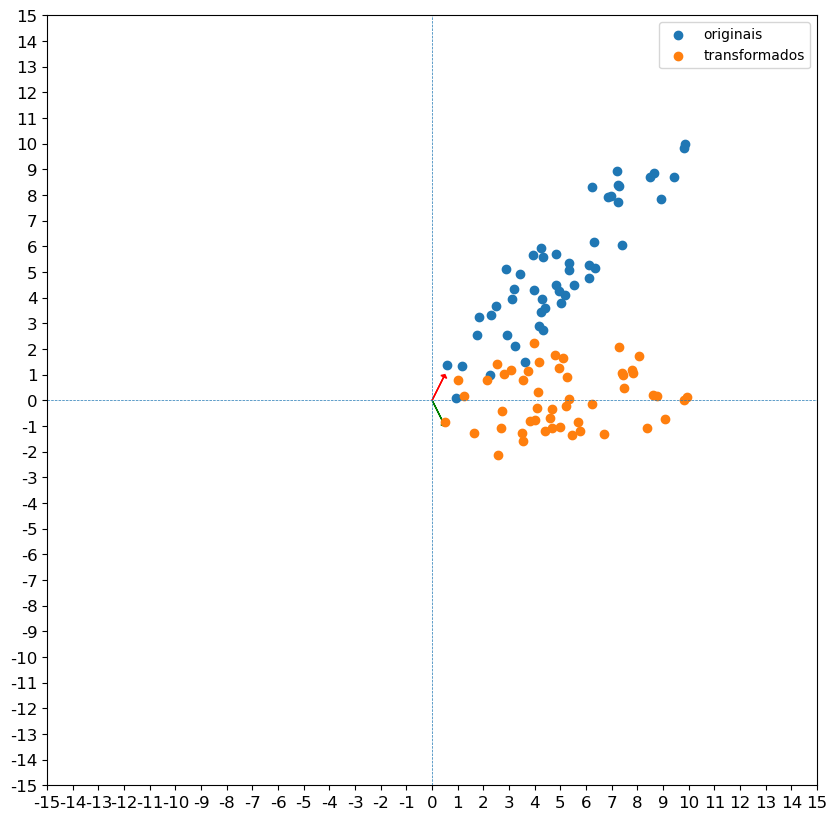

In [13]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

#Legenda
plt.legend()

### Resposta item b: Calcule a correlação entre os dados da p1 e p2

In [14]:
correlacao_original = df['p1'].corr(df['p2'])
print(f"Correlação entre p1 e p2 (dados originais): {correlacao_original}")


Correlação entre p1 e p2 (dados originais): 0.895736581872804


### Resposta item c: Calcule a correlação entre os dados transformados (média e diferença)

In [15]:
# Calcular a transformação dos dados
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Criar um novo DataFrame para os dados transformados
df_rotados = pd.DataFrame({'p1_transf': df_rot[0, :], 'p2_transf': df_rot[1, :]})

# Calcular a correlação entre os dados transformados
correlacao_transformados = df_rotados['p1_transf'].corr(df_rotados['p2_transf'])
print(f"Correlação entre p1 e p2 (dados transformados): {correlacao_transformados}")


Correlação entre p1 e p2 (dados transformados): 0.1334738541178884


In [16]:
# Média das correlações
media_correlacoes = (correlacao_original + correlacao_transformados) / 2
print(f"Média das correlações: {media_correlacoes}")


Média das correlações: 0.5146052179953462


### Resposta item d: Comente as correlações observadas.

A transformação linear pode mudar a relação entre as variáveis. Ela é uma operação que muda a forma do objeto sem mudar a sua estrutura. A média e a diferença fornece uma visão geral das correlações entre os dados originais e os dados transformados.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

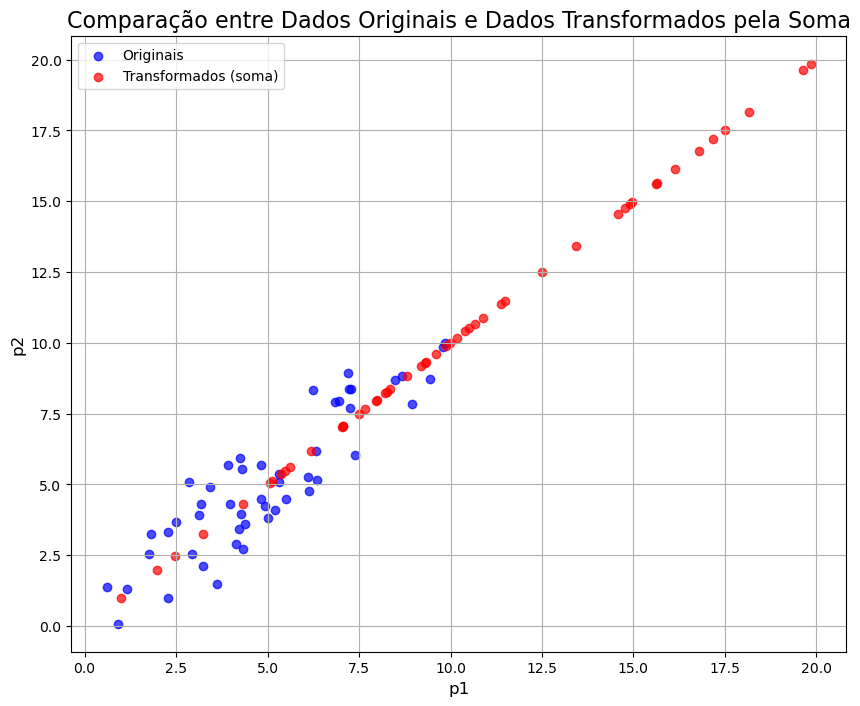

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gerando os dados (já criados anteriormente)
np.random.seed(123)

p1 = np.random.random(50) * 10
p1[p1 > 10] = 10
p1[p1 < 0] = 0

p2 = p1 + np.random.normal(0, 1, 50)
p2[p2 > 10] = 10
p2[p2 < 0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# Transformação: soma de p1 e p2
df_transformada = df.copy()
df_transformada['p1'] = df['p1'] + df['p2']  # Nova p1 é a soma de p1 e p2
df_transformada['p2'] = df['p1'] + df['p2']  # Nova p2 é a soma de p1 e p2

# Plotando os dados originais e transformados
plt.figure(figsize=(10, 8))

# Dados originais
plt.scatter(df['p1'], df['p2'], color='b', label='Originais', alpha=0.7)

# Dados transformados
plt.scatter(df_transformada['p1'], df_transformada['p2'], color='r', label='Transformados (soma)', alpha=0.7)

# Ajustando o gráfico
plt.title('Comparação entre Dados Originais e Dados Transformados pela Soma', fontsize=16)
plt.xlabel('p1', fontsize=12)
plt.ylabel('p2', fontsize=12)
plt.grid(True)
plt.legend(loc='best')

plt.show()


A soma se comporta como a soma de vetores, isto é, ela expande linearmente os resultados originais gerando um "prolongamento" nos resultados transformados pela soma. Podemos observar isso através da representação gráfica onde os pontos alaranjados são prolongamentos dos pontos azuis.